# PS5 Optic Flow
# Simon Le Goff

In [9]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt
import math
from scipy import signal 
from math import *
import random 


In [10]:
ds1_1=cv2.imread('images/DataSeq1/yos_img_01.jpg',cv2.IMREAD_GRAYSCALE)
ds1_2=cv2.imread('images/DataSeq1/yos_img_02.jpg',cv2.IMREAD_GRAYSCALE)
ds1_3=cv2.imread('images/DataSeq1/yos_img_03.jpg',cv2.IMREAD_GRAYSCALE)

ds2_0=cv2.imread('images/DataSeq2/0.png',cv2.IMREAD_GRAYSCALE)
ds2_1=cv2.imread('images/DataSeq2/1.png',cv2.IMREAD_GRAYSCALE)
ds2_2=cv2.imread('images/DataSeq2/2.png',cv2.IMREAD_GRAYSCALE)

## 1. Gaussian and Laplacian Pyramids

### 1.1 Implement REDUCE

In [11]:
def reduce(img):
    r,c=np.shape(img)
    reduced_image=np.zeros((int(r/2),int(c/2)))
    
    window=5
    sigma=1
    weight=np.asarray([[1/16],[1/4],[3/8],[1/4],[1/16]])
    weight_win=signal.convolve2d(weight.T,weight)
    

    blurred=cv2.filter2D(img,-1,weight_win)
    reduced_image=blurred[0:r-1:2,0:c-1:2]
    return reduced_image

In [12]:
red_ds1_1=reduce(ds1_1)
red_ds1_2=reduce(red_ds1_1)
red_ds1_3=reduce(red_ds1_2)
red_ds1_4=reduce(red_ds1_3)

ValueError: not enough values to unpack (expected 2, got 0)

### Build and plot Gaussian pyramids

In [5]:
def gaussian_Pyr(img,level):
    gauss_pyr=[img]
    for lvl in range(1,level):
        gauss_pyr.append(reduce(gauss_pyr[lvl-1]))
    return gauss_pyr

In [6]:
gauss_pyr_ds1=gaussian_Pyr(ds1_1,level=4)

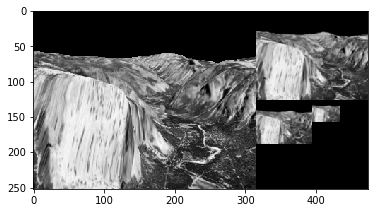

In [7]:
plot_gaussPyr=np.zeros((np.shape(gauss_pyr_ds1[0])[0],np.shape(gauss_pyr_ds1[0])[1]+np.shape(gauss_pyr_ds1[1])[1]))
plot_gaussPyr[:,0:np.shape(gauss_pyr_ds1[0])[1]]=gauss_pyr_ds1[0]
plot_gaussPyr[0:np.shape(gauss_pyr_ds1[1])[0],np.shape(gauss_pyr_ds1[0])[1]::]=gauss_pyr_ds1[1]
plot_gaussPyr[np.shape(gauss_pyr_ds1[1])[0]:np.shape(gauss_pyr_ds1[1])[0]+np.shape(gauss_pyr_ds1[2])[0],np.shape(gauss_pyr_ds1[0])[1]:np.shape(ds1_1)[1]
                +np.shape(gauss_pyr_ds1[2])[1]]=gauss_pyr_ds1[2]
plot_gaussPyr[np.shape(gauss_pyr_ds1[1])[0]:np.shape(gauss_pyr_ds1[1])[0]+np.shape(gauss_pyr_ds1[3])[0]
                ,np.shape(gauss_pyr_ds1[0])[1]+np.shape(gauss_pyr_ds1[2])[1]:np.shape(gauss_pyr_ds1[0])[1]+np.shape(gauss_pyr_ds1[2])[1]+np.shape(gauss_pyr_ds1[3])[1]]=gauss_pyr_ds1[3]

plt.imshow(plot_gaussPyr,cmap='gray')

### 1.2 Implement EXPAND

In [8]:
def expand(img):
    return cv2.resize(img,(0,0),fx=2.0,fy=2.0)

In [9]:
expanded_ds1_1=expand(ds1_1)
print("size ds1_1:",np.shape(ds1_1))
print("size ds1_1 expanded:",np.shape(expanded_ds1_1))

size ds1_1: (252, 316)
size ds1_1 expanded: (504, 632)


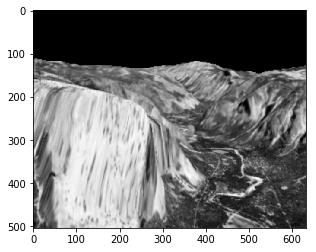

In [10]:
plt.imshow(expanded_ds1_1,cmap='gray')

### Build and plot Laplacian Pyramids

In [62]:
def laplacian_Pyr(img,level):
    gauss=gaussian_Pyr(img,level)
    lapl_pyr=[]
    for lvl in range(0,level-1):
        
        expd_level=expand(gauss[lvl+1])
        
        if(np.shape(expd_level)!=np.shape(gauss[lvl])):
            expd_level=expd_level[0:np.shape(gauss[lvl]-1)[0],0:np.shape(gauss[lvl])[1]-1]
            lapl=expd_level.astype(float)-gauss[lvl][0:np.shape(expd_level)[0],0:np.shape(expd_level)[1]].astype(float)
        else:
            lapl=expd_level.astype(float)-gauss[lvl].astype(float)
        
        lapl_pyr.append(lapl)
    
    lapl_pyr.append(gauss[level-1])
    return lapl_pyr

In [63]:
lapl_pyr_ds1=laplacian_Pyr(ds1_1,level=4)

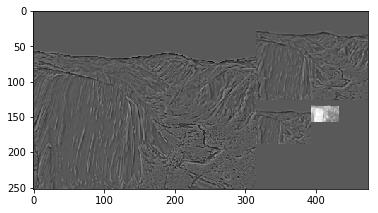

In [13]:
plot_laplPyr=np.zeros((np.shape(lapl_pyr_ds1[0])[0],np.shape(lapl_pyr_ds1[0])[1]+np.shape(lapl_pyr_ds1[1])[1]))
plot_laplPyr[:,0:np.shape(lapl_pyr_ds1[0])[1]]=lapl_pyr_ds1[0]
plot_laplPyr[0:np.shape(lapl_pyr_ds1[1])[0],np.shape(lapl_pyr_ds1[0])[1]::]=lapl_pyr_ds1[1]
plot_laplPyr[np.shape(lapl_pyr_ds1[1])[0]:np.shape(lapl_pyr_ds1[1])[0]+np.shape(lapl_pyr_ds1[2])[0],np.shape(lapl_pyr_ds1[0])[1]:np.shape(ds1_1)[1]
                +np.shape(lapl_pyr_ds1[2])[1]]=lapl_pyr_ds1[2]
plot_laplPyr[np.shape(lapl_pyr_ds1[1])[0]:np.shape(lapl_pyr_ds1[1])[0]+np.shape(lapl_pyr_ds1[3])[0]
                ,np.shape(lapl_pyr_ds1[0])[1]+np.shape(lapl_pyr_ds1[2])[1]:np.shape(lapl_pyr_ds1[0])[1]+np.shape(lapl_pyr_ds1[2])[1]+np.shape(lapl_pyr_ds1[3])[1]]=lapl_pyr_ds1[3]

plt.imshow(plot_laplPyr,cmap='gray')

## 2. Lucas Kanade Optic Flow

In [14]:
sh0=cv2.imread('images/TestSeq/Shift0.png',cv2.IMREAD_GRAYSCALE)
shR2=cv2.imread('images/TestSeq/ShiftR2.png',cv2.IMREAD_GRAYSCALE)
shR5U5=cv2.imread('images/TestSeq/ShiftR5U5.png',cv2.IMREAD_GRAYSCALE)
shR10=cv2.imread('images/TestSeq/ShiftR10.png',cv2.IMREAD_GRAYSCALE)
shR20=cv2.imread('images/TestSeq/ShiftR20.png',cv2.IMREAD_GRAYSCALE)
shR40=cv2.imread('images/TestSeq/ShiftR40.png',cv2.IMREAD_GRAYSCALE)


In [15]:
def compute_gradient(img,ksize):
    gradient_x = cv2.Sobel(img,cv2.CV_64F,1,0,ksize)
    gradient_y = cv2.Sobel(img,cv2.CV_64F,0,1,ksize)
    
    return gradient_x,gradient_y

def compute_t_gradient(img1,img2):
    return img1.astype(float)-img2.astype(float)

In [16]:
def LK_opticflow(img1,img2,smooth=False):
    
    Ix,Iy=compute_gradient(img1,ksize=5)
    It=compute_t_gradient(img1,img2)
    
    gauss=cv2.getGaussianKernel(ksize=5,sigma=1)
    gauss_window=signal.convolve2d(gauss,gauss.T)
    
    SumXX=cv2.filter2D(Ix**2,-1,gauss_window)
    SumXY=cv2.filter2D(Ix*Iy,-1,gauss_window)
    SumYY=cv2.filter2D(Iy**2,-1,gauss_window)
    SumXT=cv2.filter2D(Ix*It,-1,gauss_window)
    SumYT=cv2.filter2D(Iy*It,-1,gauss_window)

    flowU=np.zeros((np.shape(img1)))
    flowV=np.zeros((np.shape(img1)))
    r,c=np.shape(flowU)
        
    for i in range (r):
        for j in range (c):
            A=np.mat([[SumXX[i,j],SumXY[i,j]],[SumXY[i,j],SumYY[i,j]]])
            b=np.mat([[-SumXT[i,j]],[-SumYT[i,j]]])
            
            flow,residuals,_,_=np.linalg.lstsq(A,b,rcond=None)
            flowU[i,j]=flow[0]
            flowV[i,j]=flow[1]

    return flowU,flowV

In [17]:
flowU_R2,flowV_R2=LK_opticflow(shR2,sh0)
flowU_R5U5,flowV_R5U5=LK_opticflow(shR5U5,sh0)

In [49]:
def plot_arrow(img,flowU,flowV,step=15):
    fig1, ax1 = plt.subplots()
    r,c=np.shape(flowU)

    for i in range (0,r,step):
        for j in range (0,c,step):
            Q = ax1.quiver(j, i, flowU[i,j], flowV[i,j], color='r')#, #units='xy',
                      #headwidth=1.5,headlength=3)

    ax1.imshow(img,cmap='gray')

    return

We will compare the results between a smoothed and a non smoothed image. 

In [19]:
smoothed_sh0=cv2.GaussianBlur(sh0, (9,9), 5)
smoothed_shR2=cv2.GaussianBlur(shR2, (9,9), 5)
smoothed_shR5U5=cv2.GaussianBlur(shR5U5, (9,9), 5)


smt_flowU_R2,smt_flowV_R2=LK_opticflow(smoothed_shR2,smoothed_sh0)
smt_flowU_R5U5,smt_flowV_R5U5=LK_opticflow(smoothed_shR5U5,smoothed_sh0)

Text(0.5, 1.0, 'Optical flow ShiftR2 smoothed')

C:\Users\Simon\Anaconda3\lib\site-packages\matplotlib\quiver.py:665: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
C:\Users\Simon\Anaconda3\lib\site-packages\matplotlib\quiver.py:665: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
C:\Users\Simon\Anaconda3\lib\site-packages\matplotlib\quiver.py:717: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
C:\Users\Simon\Anaconda3\lib\site-packages\matplotlib\quiver.py:731: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


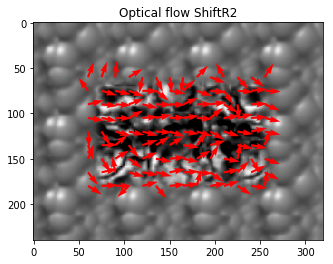

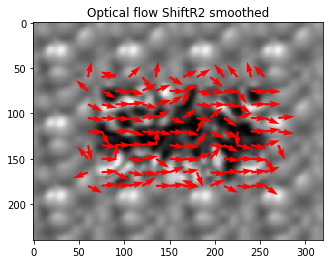

In [20]:
plot_arrow(shR2,flowU_R2,flowV_R2)
plt.title("Optical flow ShiftR2")

plot_arrow(smoothed_shR2,smt_flowU_R2,smt_flowV_R2)
plt.title("Optical flow ShiftR2 smoothed")


For the image shifted of 2 pixels, the results are quite similar between the original and smoothed image, because the displacement is small.

Text(0.5, 1.0, 'Optical flow ShiftR5 smoothed')

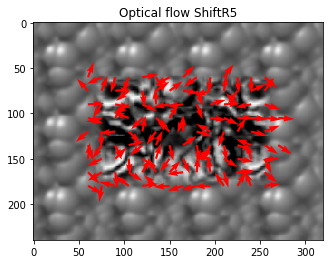

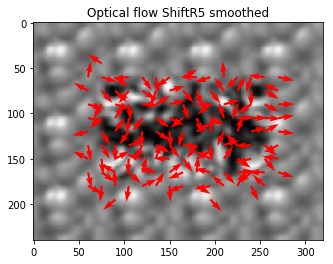

In [21]:
plot_arrow(shR5U5,flowU_R5U5,flowV_R5U5)
plt.title("Optical flow ShiftR5")

plot_arrow(smoothed_shR5U5,smt_flowU_R5U5,smt_flowV_R5U5)
plt.title("Optical flow ShiftR5 smoothed")


As we can see, we have poorer results for the optical flow of the image shifted by 5 pixels, because we approach a displacement of more than just a few pixels. 

### 2.2 Optical flow for the other shifted images

Here we apply the same optical flow estimation, but for shifts of 10, 20 and 40 pixels. 

In [22]:
flowU_R10,flowV_R10=LK_opticflow(shR10,sh0)
flowU_R20,flowV_R20=LK_opticflow(shR20,sh0)
flowU_R40,flowV_R40=LK_opticflow(shR40,sh0)

In [23]:
smoothed_shR10=cv2.GaussianBlur(shR10, (9,9), 5)
smoothed_shR20=cv2.GaussianBlur(shR20, (9,9), 5)
smoothed_shR40=cv2.GaussianBlur(shR40, (9,9), 5)

smt_flowU_R10,smt_flowV_R10=LK_opticflow(smoothed_shR10,smoothed_sh0)
smt_flowU_R20,smt_flowV_R20=LK_opticflow(smoothed_shR20,smoothed_sh0)
smt_flowU_R40,smt_flowV_R40=LK_opticflow(smoothed_shR40,smoothed_sh0)


Text(0.5, 1.0, 'Optical flow ShiftR10 smoothed')

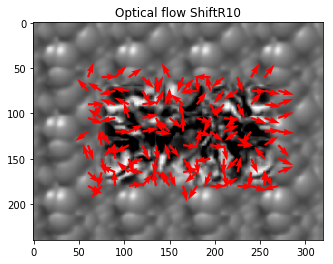

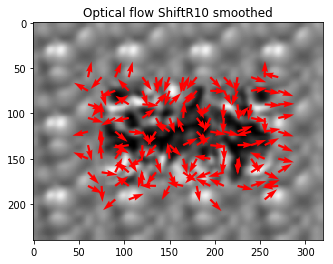

In [24]:
plot_arrow(shR10,flowU_R10,flowV_R10)
plt.title("Optical flow ShiftR10")

plot_arrow(smoothed_shR10,smt_flowU_R10,smt_flowV_R10)
plt.title("Optical flow ShiftR10 smoothed")

Text(0.5, 1.0, 'Optical flow ShiftR20 smoothed')

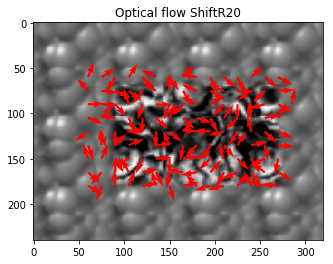

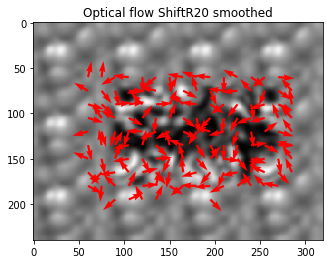

In [25]:
plot_arrow(shR20,flowU_R20,flowV_R20)
plt.title("Optical flow ShiftR20")

plot_arrow(smoothed_shR20,smt_flowU_R20,smt_flowV_R20)
plt.title("Optical flow ShiftR20 smoothed")

Text(0.5, 1.0, 'Optical flow ShiftR40 smoothed')

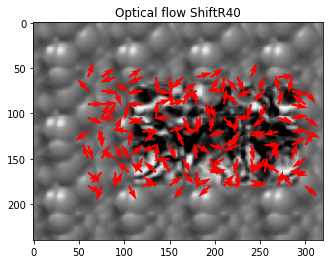

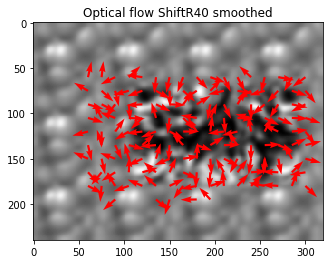

In [26]:
plot_arrow(shR40,flowU_R40,flowV_R40)
plt.title("Optical flow ShiftR40")

plot_arrow(smoothed_shR40,smt_flowU_R40,smt_flowV_R40)
plt.title("Optical flow ShiftR40 smoothed")

We can observe with these three applications that the more shift there is and the less LK method for flow estimation works. 

### LK on the data sequences

We want to apply the single LK implementation to the DataSeq1 sequence. In order to do that, we need to find a level of a Gaussian pyramid in which the displacement between 1/2 and 2/3 is just a few pixels. 

We will need a warp function to verify our result. We use the cv2.remap function to do that. 

In [27]:
def warp(img,flowU,flowV):
    X, Y = np.meshgrid(np.arange(0,np.shape(img)[1],1),np.arange(0,np.shape(img)[0],1))
    warped=cv2.remap(img,(X+flowU).astype(np.float32),(Y+flowV).astype(np.float32),cv2.INTER_LINEAR)
    return warped

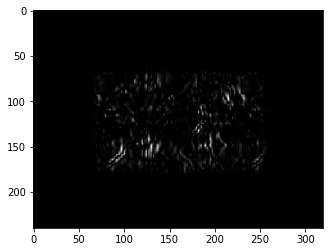

In [29]:
warp_R2=warp(shR2,flowU_R2,flowV_R2)
error=warp_R2.astype(float)-sh0.astype(float)
error=error**2
cv2.normalize(error, error, alpha=0, beta=255,
                               norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

plt.imshow(error,cmap='gray')

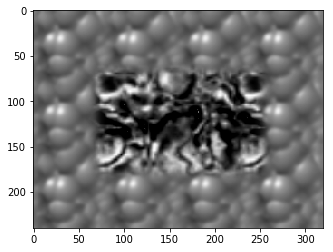

In [32]:
plt.imshow(warp_R2,cmap='gray')

#### Optical flow between the first and second image of DataSeq1

In [33]:
g_pyr_ds1_1=gaussian_Pyr(ds1_1,level=4)
g_pyr_ds1_2=gaussian_Pyr(ds1_2,level=4)
g_pyr_ds1_3=gaussian_Pyr(ds1_3,level=4)

In [34]:
#Level 0
fU_ds12_0,fV_ds12_0=LK_opticflow(g_pyr_ds1_1[0],g_pyr_ds1_2[0])
#Level 1
fU_ds12_1,fV_ds12_1=LK_opticflow(g_pyr_ds1_1[1],g_pyr_ds1_2[1])
#Level 2
fU_ds12_2,fV_ds12_2=LK_opticflow(g_pyr_ds1_1[2],g_pyr_ds1_2[2])
#Level 3
fU_ds12_3,fV_ds12_3=LK_opticflow(g_pyr_ds1_1[3],g_pyr_ds1_2[3])

In [35]:
print(np.shape(g_pyr_ds1_1[0]))
print(np.shape(g_pyr_ds1_2[0]))
print(np.shape(fU_ds12_0))

(252, 316)
(252, 316)
(252, 316)


Text(0.5, 1.0, 'Optical Flow at level 0')

C:\Users\Simon\Anaconda3\lib\site-packages\matplotlib\quiver.py:665: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
C:\Users\Simon\Anaconda3\lib\site-packages\matplotlib\quiver.py:665: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
C:\Users\Simon\Anaconda3\lib\site-packages\matplotlib\quiver.py:717: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
C:\Users\Simon\Anaconda3\lib\site-packages\matplotlib\quiver.py:731: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


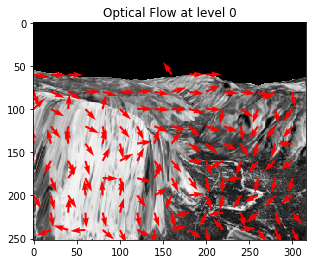

In [36]:
plot_arrow(g_pyr_ds1_2[0],fU_ds12_0,fV_ds12_0,step=20)
plt.title("Optical Flow at level 0")

Text(0.5, 1.0, 'Optical Flow at level 1')

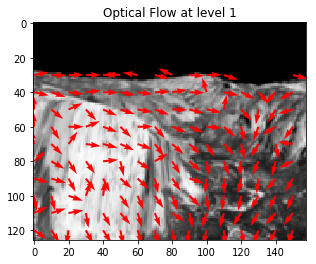

In [37]:
plot_arrow(g_pyr_ds1_2[1],fU_ds12_1,fV_ds12_1,step=10)
plt.title("Optical Flow at level 1")

Text(0.5, 1.0, 'Optical Flow at level 2')

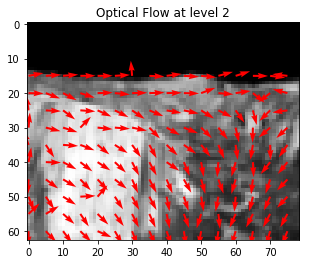

In [39]:
plot_arrow(g_pyr_ds1_2[2],fU_ds12_2,fV_ds12_2,step=5)
plt.title("Optical Flow at level 2")

Let's check the error between the orginal image and the warped one with the flow field found.

In [40]:
warp_ds1_0=warp(g_pyr_ds1_2[0],fU_ds12_0,fV_ds12_0)
warp_ds1_1=warp(g_pyr_ds1_2[1],fU_ds12_1,fV_ds12_1)
warp_ds1_2=warp(g_pyr_ds1_2[2],fU_ds12_2,fV_ds12_2)

In [41]:
err0=warp_ds1_0.astype(float)-g_pyr_ds1_1[0].astype(float)
err0=err0**2
err0=cv2.normalize(err0, err0, alpha=0, beta=255,
                               norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

err1=warp_ds1_1.astype(float)-g_pyr_ds1_1[1].astype(float)
err1=err1**2
err1=cv2.normalize(err1, err1, alpha=0, beta=255,
                               norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

err2=warp_ds1_2.astype(float)-g_pyr_ds1_1[2].astype(float)
err2=err2**2
err2=cv2.normalize(err2, err2, alpha=0, beta=255,
                               norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)


Text(0.5, 1.0, 'Error at level 2')

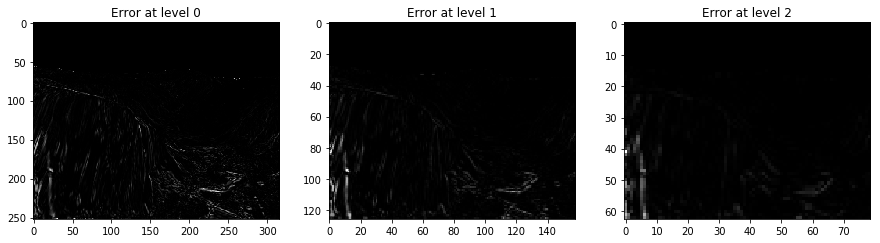

In [42]:
fig=plt.figure(figsize=(15,15))

plt.subplot(131)
plt.imshow(err0,cmap="gray")
plt.title("Error at level 0")
plt.subplot(132)
plt.imshow(err1,cmap="gray")
plt.title("Error at level 1")
plt.subplot(133)
plt.imshow(err2,cmap="gray")
plt.title("Error at level 2")

The results confirm the fact that the error in optical flow diminuish when we use images close to the coarse levels.

## 3 Hierarchical LK Optic Flow

In [59]:
def hierarchical_LK(L,R,level):
    gpyr_L=gaussian_Pyr(L,level)
    gpyr_R=gaussian_Pyr(R,level)
    
    Lk=gpyr_L[level-1]
    Rk=gpyr_R[level-1]
    
    U=np.zeros((np.shape(Lk)))
    V=np.zeros((np.shape(Lk)))
    Dx,Dy=LK_opticflow(Rk,Lk)
    
    U+=Dx
    V+=Dy
    k=level-2
        
    while k>0:
        Lk=gpyr_L[k]
        Rk=gpyr_R[k]
        U=2*expand(U)
        V=2*expand(V)
        Wk=warp(Lk,U,V)
        Dx,Dy=LK_opticflow(Rk,Wk)
        U+=Dx
        V+=Dy
        k-=1
    return U,V

In [53]:
u_HLK_sh2,v_HLK_sh2=hierarchical_LK(sh0,shR2,1)

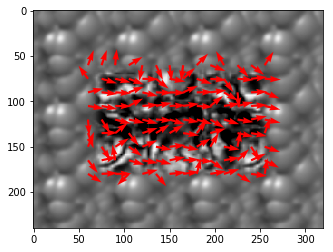

In [52]:
plot_arrow(shR2,u_HLK_sh2,v_HLK_sh2)

In [60]:
u_HLK_shR10,v_HLK_shR10=hierarchical_LK(sh0,shR10,2)

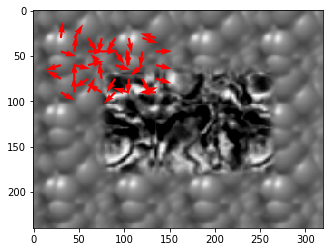

In [61]:
plot_arrow(shR10,u_HLK_shR10,v_HLK_shR10)

As you can notice, my hierarchical_LK program works for the shift of 2 pixels, but not for the orthers, meaning there is a problem in the implementation of my loop, but I could not figure out what.